# Este caso de estudio servirá para demostrar el uso del paquete AutoGluon que permite llevar a cabo un prototipado rápido de moodelos de Aprendizaje de Máquina (ML)

## IMPORTAR LIBRERIAS Y CONJUNTO DE DATOS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Para que funcione Autogluon en Google Colab, es necesario instalar ipkernel y reiniciar el Notebook
# El kernel IPython es el backend de ejecución para Jupyter

!pip install -U ipykernel

  Obtaining dependency information for ipykernel from https://files.pythonhosted.org/packages/94/e3/70fb6e6bdd42cb0586d6b6680713997d2a9dc46642aec207ca04d0df80b8/ipykernel-6.25.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/154.2 kB ? eta -:--:--
   --------------- ------------------------ 61.4/154.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  153.6/154.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 154.2/154.2 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.23.0
    Uninstalling ipykernel-6.23.0:
      Successfully uninstalled ipykernel-6.23.0


In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
  Using cached setuptools-68.2.2-py3-none-any.whl.metadata (6.3 kB)
  Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/b8/8b/31273bf66016be6ad22bb7345c37ff350276cfd46e389a0c2ac5da9d9073/wheel-0.41.2-py3-none-any.whl.metadata
  Using cached wheel-0.41.2-py3-none-any.whl.metadata (2.2 kB)
Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
Using cached wheel-0.41.2-py3-none-any.whl (64 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.40.0
    Uninstalling wheel-0.40.0:
      Successfully uninstalled wheel-0.40.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.0.26 requires setuptools~=60.2.0, but you have setuptools 68.2.2 which is incompatible.
tensorflow-intel 2.14.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


     ---------------------------------------- 0.0/33.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.1 MB 1.3 MB/s eta 0:00:26
     ---------------------------------------- 0.1/33.1 MB 1.7 MB/s eta 0:00:20
     ---------------------------------------- 0.3/33.1 MB 2.4 MB/s eta 0:00:14
      --------------------------------------- 0.5/33.1 MB 3.1 MB/s eta 0:00:11
     - -------------------------------------- 0.9/33.1 MB 4.1 MB/s eta 0:00:08
     - -------------------------------------- 1.0/33.1 MB 4.1 MB/s eta 0:00:08
     - -------------------------------------- 1.3/33.1 MB 4.2 MB/s eta 0:00:08
     - -------------------------------------- 1.6/33.1 MB 4.8 MB/s eta 0:00:07
     -- ------------------------------------- 1.8/33.1 MB 5.0 MB/s eta 0:00:07
     -- ------------------------------------- 1.9/33.1 MB 4.4 MB/s eta 0:00:08
     -- ------------------------------------- 2.4/33.1 MB 5.0 MB/s eta 0:00:07
     --- ------------------------------------ 2.8/33.1 MB 5

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [2009 lines of output]
      Running from numpy source directory.
      C:\Users\juanc\AppData\Local\Temp\pip-install-z25rnhaq\numpy_af9e9049e08f439491475a17d8ce94a2\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['C:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\', 'C:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\libs', 'C:\\src\\vcpkg\\installed\\x64-windows\\lib']
        NOT AVAILABLE
      
      blis_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCComp

     ---------------------------------------- 0.0/953.1 kB ? eta -:--:--
     - ----------------------------------- 41.0/953.1 kB 960.0 kB/s eta 0:00:01
     ---- --------------------------------- 122.9/953.1 kB 1.4 MB/s eta 0:00:01
     ----------- -------------------------- 286.7/953.1 kB 2.5 MB/s eta 0:00:01
     ---------------------- --------------- 553.0/953.1 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 953.1/953.1 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.2.2
    Uninstalling setuptools-68.2.2:
      Successfully uninstalled setuptools-68.2.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.14.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [4]:
!pip install autogluon autogluon.tabular "mxnet<2.0.0"

  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
INFO: pip is looking at multiple versions of mxnet to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/33.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.0 MB 1.4 MB/s eta 0:00:25
     --------------------------------------- 0.0/33.0 MB 495.5 kB/s eta 0:01:07
     --------------------------------------- 0.1/33.0 MB 939.4 kB/s eta 0:00:36
     --------------------------------------- 0.1/33.0 MB 950.9 kB/s eta 0:00:35
     ---------------------------------------- 0.2/33.0 MB 1.1 MB/s eta 0:00:30
     ---------------------------------------- 0.3/33.0 MB 1.3 MB/s eta 0:00:25
      --------------------------------------- 0.4/33.0 MB 1.6 MB/s eta 0:00:21
      --------------------------------------- 0.4/33.0 MB 1.6 MB/s eta 0:00:21
      --------------------------------------- 0.4/33.0 MB 1.6 MB/s eta 0:00:21
  

     ------------------------- -------------- 12.5/20.0 MB 1.0 MB/s eta 0:00:08
     ------------------------- -------------- 12.6/20.0 MB 1.0 MB/s eta 0:00:08
     ------------------------- -------------- 12.6/20.0 MB 1.0 MB/s eta 0:00:08
     ------------------------- -------------- 12.7/20.0 MB 1.0 MB/s eta 0:00:08
     ------------------------- -------------- 12.7/20.0 MB 1.0 MB/s eta 0:00:08
     ------------------------ ------------- 12.8/20.0 MB 999.5 kB/s eta 0:00:08
     ------------------------ ------------- 12.8/20.0 MB 998.0 kB/s eta 0:00:08
     ------------------------ ------------- 12.8/20.0 MB 995.0 kB/s eta 0:00:08
     ------------------------ ------------- 12.9/20.0 MB 991.9 kB/s eta 0:00:08
     ------------------------ ------------- 12.9/20.0 MB 989.0 kB/s eta 0:00:08
     ------------------------ ------------- 13.0/20.0 MB 986.0 kB/s eta 0:00:08
     ------------------------ ------------- 13.0/20.0 MB 984.5 kB/s eta 0:00:08
     ------------------------ ----------

El AutoGluon esta modularizado en sub-módulos para datos:  
* Tabular, 
* text,
* Images

In [5]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [7]:
seguros = pd.read_csv('diabetes.csv')

## ENTRENAR MULTIPLES MODELOS UTILANDO AUTOGLUON

In [8]:
# Dividir los datos en un 80% para entrenamiento y 20% para pruebas

from sklearn.model_selection import train_test_split
X_entreno, X_prueba = train_test_split(seguros, test_size=0.2, random_state=0)

In [9]:
X_entreno

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1
118,4,97,60,23,0,28.2,0.443,22,0
247,0,165,90,33,680,52.3,0.427,23,0
157,1,109,56,21,135,25.2,0.833,23,0
468,8,120,0,0,0,30.0,0.183,38,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
192,7,159,66,0,0,30.4,0.383,36,1
629,4,94,65,22,0,24.7,0.148,21,0
559,11,85,74,0,0,30.1,0.300,35,0


In [10]:
X_prueba

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29,1
482,4,85,58,22,49,27.8,0.306,28,0
230,4,142,86,0,0,44.0,0.645,22,1
527,3,116,74,15,105,26.3,0.107,24,0


Se entrenarán múltiples modelos ML de regresión utilizando AutoGluon

Es necesario especifcar la columna "etiqueta/meta/", datos de entreno, límite de tiempo, y pre-determinados

Nótese que AutoGluon detecta automáticamente si el problema es de clasificación o regresión basado en la columna "etiqueta"

Para problemas de tipo regresión, los valores de "etiqueta" son generalmente números de punto flotante con un gran número de valores únicos

In [12]:
predictor = TabularPredictor(label="Outcome", 
                             problem_type = 'regression', 
                             eval_metric = 'r2').fit(train_data = X_entreno, 
                                                     time_limit = 200, 
                                                     presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20231015_014550\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels\ag-20231015_014550\"
AutoGluon Version:  0.8.2
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   221.40 GB / 998.60 GB (22.2%)
Train Data Rows:    614
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    19054.5 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeF

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.314717       0.204029  24.952466                0.000000           0.216064            2       True         12
1          CatBoost_BAG_L1   0.296548       0.015976  10.056136                0.015976          10.056136            1       True          6
2   NeuralNetFastAI_BAG_L1   0.272706       0.032030   3.408975                0.032030           3.408975            1       True          8
3   RandomForestMSE_BAG_L1   0.268632       0.064000   3.595555                0.064000           3.595555            1       True          5
4     ExtraTreesMSE_BAG_L1   0.267794       0.072021   0.440323                0.072021           0.440323            1       True          7
5        LightGBMXT_BAG_L1   0.265782       0.008000   1.352767                0.00800

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.11208132751746736,
  'KNeighborsDist_BAG_L1': 0.11354951512807254,
  'LightGBMXT_BAG_L1': 0.2657824227364084,
  'LightGBM_BAG_L1': 0.2433987331868681,
  'RandomForestMSE_BAG_L1': 0.26863178748383976,
  'CatBoost_BAG_L1': 0.29654779975887546,
  'ExtraTreesMSE_BAG_L1

## EVALUAR EL RENDIMIENTO DE LOS MODELOS ENTRENADOS

In [14]:
predictor.leaderboard()

                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.314717       0.204029  24.952466                0.000000           0.216064            2       True         12
1          CatBoost_BAG_L1   0.296548       0.015976  10.056136                0.015976          10.056136            1       True          6
2   NeuralNetFastAI_BAG_L1   0.272706       0.032030   3.408975                0.032030           3.408975            1       True          8
3   RandomForestMSE_BAG_L1   0.268632       0.064000   3.595555                0.064000           3.595555            1       True          5
4     ExtraTreesMSE_BAG_L1   0.267794       0.072021   0.440323                0.072021           0.440323            1       True          7
5        LightGBMXT_BAG_L1   0.265782       0.008000   1.352767                0.008000           1.352767            1       True          3
6     

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.314717,0.204029,24.952466,0.000000,0.216064,2,True,12
1,CatBoost_BAG_L1,0.296548,0.015976,10.056136,0.015976,10.056136,1,True,6
2,NeuralNetFastAI_BAG_L1,0.272706,0.032030,3.408975,0.032030,3.408975,1,True,8
3,RandomForestMSE_BAG_L1,0.268632,0.064000,3.595555,0.064000,3.595555,1,True,5
4,ExtraTreesMSE_BAG_L1,0.267794,0.072021,0.440323,0.072021,0.440323,1,True,7
5,LightGBMXT_BAG_L1,0.265782,0.008000,1.352767,0.008000,1.352767,1,True,3
6,XGBoost_BAG_L1,0.261986,0.044007,1.976834,0.044007,1.976834,1,True,9
7,LightGBM_BAG_L1,0.243399,0.008003,0.872449,0.008003,0.872449,1,True,4
8,LightGBMLarge_BAG_L1,0.238974,0.000000,2.225346,0.000000,2.225346,1,True,11
9,NeuralNetTorch_BAG_L1,0.184437,0.048017,5.698901,0.048017,5.698901,1,True,10


                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.314717       0.204029  24.952466                0.000000           0.216064            2       True         12
1          CatBoost_BAG_L1   0.296548       0.015976  10.056136                0.015976          10.056136            1       True          6
2   NeuralNetFastAI_BAG_L1   0.272706       0.032030   3.408975                0.032030           3.408975            1       True          8
3   RandomForestMSE_BAG_L1   0.268632       0.064000   3.595555                0.064000           3.595555            1       True          5
4     ExtraTreesMSE_BAG_L1   0.267794       0.072021   0.440323                0.072021           0.440323            1       True          7
5        LightGBMXT_BAG_L1   0.265782       0.008000   1.352767                0.008000           1.352767            1       True          3
6     

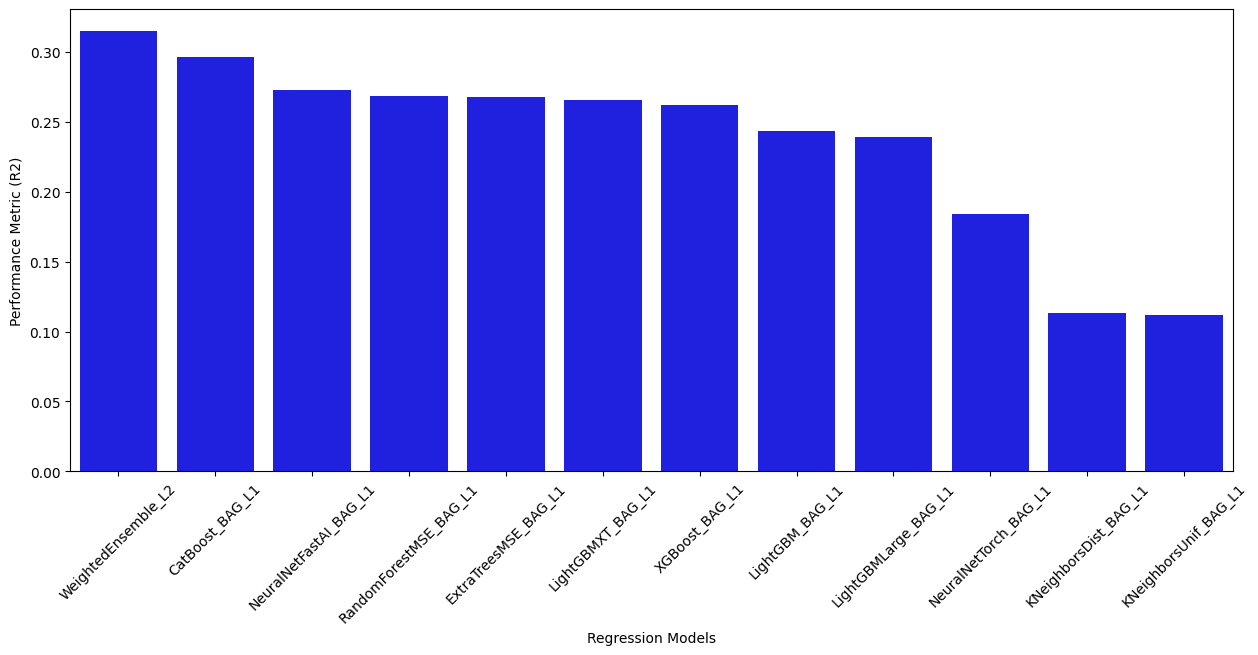

In [15]:
# Inicializar la figura de matplotlib

f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [16]:
predictor.evaluate(X_prueba)

Evaluation: r2 on test data: 0.34639955084968055
Evaluations on test data:
{
    "r2": 0.34639955084968055,
    "root_mean_squared_error": -0.3722856256459738,
    "mean_squared_error": -0.13859658706261413,
    "mean_absolute_error": -0.3074057208156431,
    "pearsonr": 0.5997119567738315,
    "median_absolute_error": -0.23768944293260574
}


{'r2': 0.34639955084968055,
 'root_mean_squared_error': -0.3722856256459738,
 'mean_squared_error': -0.13859658706261413,
 'mean_absolute_error': -0.3074057208156431,
 'pearsonr': 0.5997119567738315,
 'median_absolute_error': -0.23768944293260574}

In [17]:
# Evaluar el rendimiento de los modelos
# Seleccionar 5 observaciones del conjunto de datos de prueba y generar las predicciones

y_pred = predictor.predict(X_prueba)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [0.866974413394928, 0.14180314540863037, 0.11824913322925568, 0.6747948527336121, 0.12917226552963257]


In [18]:
X_prueba

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29,1
482,4,85,58,22,49,27.8,0.306,28,0
230,4,142,86,0,0,44.0,0.645,22,1
527,3,116,74,15,105,26.3,0.107,24,0


In [20]:
y_prueba = X_prueba['Outcome']
y_prueba # valores correctos

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

Text(0.5, 0, 'Valores reales')

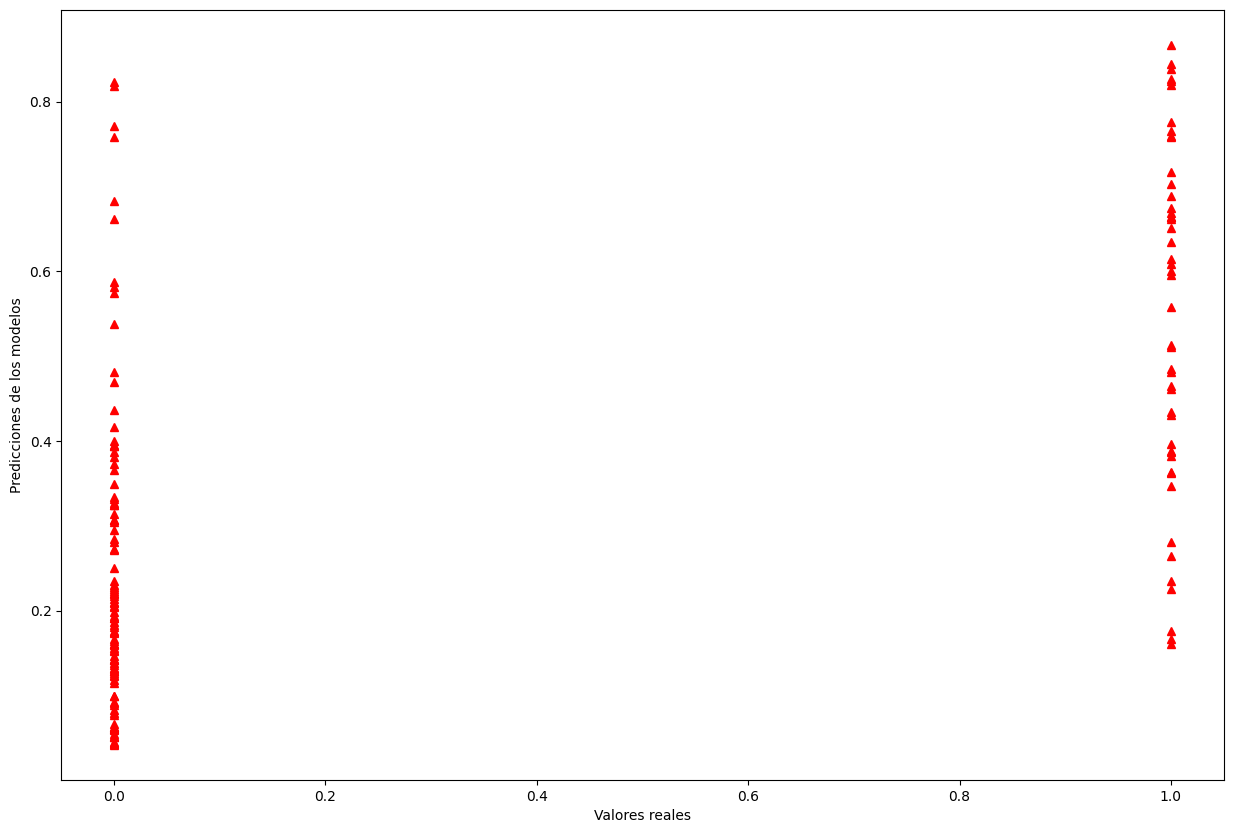

In [21]:
y_predicc = predictor.predict(X_prueba)
plt.figure(figsize = (15, 10))
plt.plot(y_prueba, y_predicc, "^", color = 'r')
plt.ylabel('Predicciones de los modelos')
plt.xlabel('Valores reales')

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_prueba, y_predicc)),'.3f'))
MSE = mean_squared_error(y_prueba, y_predicc)
MAE = mean_absolute_error(y_prueba, y_predicc)
r2 = r2_score(y_prueba, y_predicc)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.372 
MSE = 0.13859658706261413 
MAE = 0.3074057208156431 
R2 = 0.34639955084968055
